# Geographic Visualization 

In [25]:
# data and libraries import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [26]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [27]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\guzic\Contacts\Baseball Analysis\03 Scripts\us-states.json'

In [28]:
country_geo

'C:\\Users\\guzic\\Contacts\\Baseball Analysis\\03 Scripts\\us-states.json'

In [29]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\guzic\Contacts\Baseball Analysis\03 Scripts\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [30]:
#path import

path = r'C:\Users\guzic\Contacts\Baseball Analysis'

In [31]:
# dataset import

bb = pd.read_csv(os.path.join(path, '02 Data', 'Prepped Data', 'CLEANED Baseball Hitter.csv'), index_col = False)

In [32]:
bb.head()

,Unnamed: 0,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,...,Home Run,Runs Batted In,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards
0,2,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,...,13.0,69.0,28.0,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4
1,3,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,...,27.0,106.0,49.0,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9"
2,4,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,...,26.0,92.0,37.0,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3"
3,5,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,...,44.0,132.0,57.0,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1"
4,6,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,...,30.0,95.0,59.0,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG"


In [33]:
# dropping Unnamed: columns

bb = bb.drop(columns = 'Unnamed: 0')

In [34]:
bb.head()

,name,url,Year,Age,Team,League,Games,Plate Appearances,At Bats,Runs,...,Home Run,Runs Batted In,Walk,Batting Average,On Base Percentage,Slugging Percentage,On Base Plus Slugging,Total Bases,Pos,Awards
0,Henry Aaron,/players/a/aaronha01.shtml,1954,20,MLN,NL,122.0,509.0,468.0,58.0,...,13.0,69.0,28.0,0.280,0.322,0.447,0.769,209.0,*79/H,RoY-4
1,Henry Aaron,/players/a/aaronha01.shtml,1955,21,MLN,NL,153.0,665.0,602.0,105.0,...,27.0,106.0,49.0,0.314,0.366,0.540,0.906,325.0,*974/H,"AS,MVP-9"
2,Henry Aaron,/players/a/aaronha01.shtml,1956,22,MLN,NL,153.0,660.0,609.0,106.0,...,26.0,92.0,37.0,0.328,0.365,0.558,0.923,340.0,*9/H,"AS,MVP-3"
3,Henry Aaron,/players/a/aaronha01.shtml,1957,23,MLN,NL,151.0,675.0,615.0,118.0,...,44.0,132.0,57.0,0.322,0.378,0.600,0.978,369.0,*98/H,"AS,MVP-1"
4,Henry Aaron,/players/a/aaronha01.shtml,1958,24,MLN,NL,153.0,664.0,601.0,109.0,...,30.0,95.0,59.0,0.326,0.386,0.546,0.931,328.0,*98,"AS,MVP-3,GG"


In [35]:
# shape check

bb.shape

(119060, 23)

In [36]:
bb.columns

Index(['name', 'url', 'Year', 'Age', 'Team', 'League', 'Games',
       'Plate Appearances', 'At Bats', 'Runs', 'Hits', 'Double', 'Triple',
       'Home Run', 'Runs Batted In', 'Walk', 'Batting Average',
       'On Base Percentage', 'Slugging Percentage', 'On Base Plus Slugging',
       'Total Bases', 'Pos', 'Awards'],
      dtype='object')

# Question to explore

In [37]:
# Does a certain age player yield more home runs? Or RBIs? Or OBP?
# Does a certain team have a history of the most runs? OBP?
# Do Hits, Doubles, or Walks, etc. lead to more runs?
# Does the number of games play lead to more runs? RBIs, etc.?
# Do more plate appearances lead to more runs, etc.?
# Does a certain field positions have better hitting stats?
# Does a higher OBP lead to higher runs? 
# What variable leads to the most number of runs? Having the most runs is how you win games
# How have trends changed over time?

# Most important question - What leads to the most amount of runs?

In [38]:
# Need to create a new column with State Name

In [39]:
bb['Team'].value_counts()

TOT                4705
CHC                2935
STL                2908
CIN                2838
PIT                2825
                   ... 
DET-CAL-min           1
CHW-SFG-min           1
SEA-MIA-WSN-min       1
STL-WSH-min           1
BAL-PHI-MLN-min       1
Name: Team, Length: 1370, dtype: int64

In [40]:
# Had to do some cleaning...
 
# created new column w/ just first 3 characters for Team_city_code (it was easiest to do this way)
# Then, ran a LOC to create new column STATE NAME where the city is located in
# Then, create a new dataframe to use for analysis
# Then, map can be created by state

In [41]:
bb['team_city_code'] = bb['Team'].str[:3]

In [42]:
bb.columns

Index(['name', 'url', 'Year', 'Age', 'Team', 'League', 'Games',
       'Plate Appearances', 'At Bats', 'Runs', 'Hits', 'Double', 'Triple',
       'Home Run', 'Runs Batted In', 'Walk', 'Batting Average',
       'On Base Percentage', 'Slugging Percentage', 'On Base Plus Slugging',
       'Total Bases', 'Pos', 'Awards', 'team_city_code'],
      dtype='object')

In [43]:
bb['team_city_code'].value_counts()

STL    5123
CHC    5052
PIT    4908
NYY    4779
CIN    4754
       ... 
MGS       8
LRG       7
CG        7
NWB       5
RIC       1
Name: team_city_code, Length: 161, dtype: int64

In [44]:
bb['team_city_code'].unique()

array(['MLN', 'ATL', 'MIL', 'HOU', 'PHI', 'TOT', 'NYY', 'LAA', 'LAD',
       'NYM', 'CHW', 'STL', 'WSN', 'COL', 'CIN', 'CLE', 'CAL', 'TBR',
       'MIA', 'ARI', 'OAK', 'KCM', 'SLS', 'HG', 'CAG', 'IC', 'WSH', 'MIN',
       'SDP', 'TOR', 'BAL', 'TEX', 'NYG', 'SFG', 'MON', 'PIT', 'FLA',
       'CHC', 'BRO', 'BOS', 'ANA', 'PS', 'DET', 'BSN', 'WHS', 'SEA',
       'TBD', 'KCR', 'NYC', 'CSW', 'CS', 'SLB', 'PHA', 'SYR', 'BUF',
       'TRO', 'BBB', 'MRM', 'NE', 'CSE', 'WSA', 'CLV', 'KCC', 'ABC',
       'HIL', 'WMP', 'NS', 'PTG', 'KCA', 'LOU', 'HAR', 'PRO', 'SLM',
       'TOL', 'WAS', 'COG', 'WP', 'BTT', 'MLA', 'IND', 'BWW', 'CKK',
       'MRS', 'AB2', 'CBB', 'PC', 'SEN', 'IAB', 'JRC', 'BCA', 'ID', 'AB3',
       'SL3', 'SNS', 'NBY', 'CBE', 'BEG', 'BLA', 'BRG', 'NLG', 'NWB',
       'ND', 'TT', 'SEP', 'LVB', 'NEG', 'CC', 'PBB', 'DW', 'PBG', 'DTN',
       'BLN', 'DS', 'KCN', 'DM', 'CEL', 'HBG', 'PK', 'CTS', 'CBN', 'CHT',
       'CTG', 'CBR', 'CHI', 'SLG', 'NYU', 'BBS', 'NYP', 'TC', 'MLG',
       'W

In [46]:
# Use ONLY current teams/cities - create new column and then dataframe based on
# just the current cities/states
# Will exclude 1 current team - Toronoto Blue Jays since they are in Canada

In [45]:
#	Code	City	State	State Code
#				
#	ARI		Arizona	AZ
#	ATL	Atlanta	Georgia	GA
#	BAL	Baltimore	Maryland	MD
#	BOS	Boston	Maryland	MD
#	CHC	Chicago	Illinois	IL
#	CHW	Chicago	Illinois	IL
#	CIN	Cincinnati	Ohio	OH
#	CLE	Cleveland	Ohio	OH
#	COL		Colorado	CO
#	DET	Detroit	Michigan	MI
#	HOU	Houston	Texas	TX
#	KCA	Kansas City	Kansas	KS
#	LAA	Los Angeles	California	CA
#	LAD	Los Angeles	California	CA
#	MIA	Miami	Florida	FL
#	MIL	Milwaukee	Wisconsin	WI
#	MIN		Minnesota	MN
#	NYM		New York	NY
#	NYY		New York	NY
#	OAK	Oakland	California	CA
#	PHI	Philladelphia	Pennsylvania	PA
#	PIT	Pittsburgh	Pennsylvania	PA
#	SDP	San Diego	California	CA
#	SEA	Seattle	Washinton	WA
#	SFG	San Francisco	California	CA
#	STL	St. Louis	Missouri	MO
#	TBR	Tampa Bay	Florida	FL
#	TEX		Texas	TX
#	TOR	Toronto	Canada	
#	WSH	Washington	Washington, DC	DC

In [47]:
# Crate new state_name column and then fill missing with "Not a current Major League Team in USA"

# Create NEW data frame using the state_name column

In [48]:
bb.loc[bb['team_city_code'] == 'WSH', 'state_name'] = 'Washington, DC'

In [49]:
bb.loc[bb['team_city_code'] == 'TEX', 'state_name'] = 'Texas'

In [50]:
bb.loc[bb['team_city_code'] == 'TBR', 'state_name'] = 'Florida'

In [51]:
bb.loc[bb['team_city_code'] == 'STL', 'state_name'] = 'Missouri'

In [52]:
bb.loc[bb['team_city_code'] == 'SFG', 'state_name'] = 'Califonia'

In [53]:
bb.loc[bb['team_city_code'] == 'SEA', 'state_name'] = 'Washington'

In [54]:
bb.loc[bb['team_city_code'] == 'SDP', 'state_name'] = 'California'

In [55]:
bb.loc[bb['team_city_code'] == 'PIT', 'state_name'] = 'Pennsylvania'

In [56]:
bb.loc[bb['team_city_code'] == 'PHI', 'state_name'] = 'Pennsylvania'

In [57]:
bb.loc[bb['team_city_code'] == 'OAK', 'state_name'] = 'California'

In [58]:
bb.loc[bb['team_city_code'] == 'NYY', 'state_name'] = 'New York'

In [59]:
bb.loc[bb['team_city_code'] == 'NYM', 'state_name'] = 'New York'

In [60]:
bb.loc[bb['team_city_code'] == 'MIN', 'state_name'] = 'Minnesota'

In [61]:
bb.loc[bb['team_city_code'] == 'MIL', 'state_name'] = 'Wisconsin'

In [62]:
bb.loc[bb['team_city_code'] == 'MIA', 'state_name'] = 'Florida'

In [63]:
bb.loc[bb['team_city_code'] == 'LAD', 'state_name'] = 'California'

In [64]:
bb.loc[bb['team_city_code'] == 'LAA', 'state_name'] = 'California'

In [65]:
bb.loc[bb['team_city_code'] == 'KCA', 'state_name'] = 'Kansas'

In [66]:
bb.loc[bb['team_city_code'] == 'HOU', 'state_name'] = 'Texas'

In [67]:
bb.loc[bb['team_city_code'] == 'DET', 'state_name'] = 'Michigan'

In [68]:
bb.loc[bb['team_city_code'] == 'COL', 'state_name'] = 'Colorado'

In [69]:
bb.loc[bb['team_city_code'] == 'CLE', 'state_name'] = 'Ohio'

In [70]:
bb.loc[bb['team_city_code'] == 'CIN', 'state_name'] = 'Ohio'

In [71]:
bb.loc[bb['team_city_code'] == 'CHW', 'state_name'] = 'Illinois'

In [72]:
bb.loc[bb['team_city_code'] == 'CHC', 'state_name'] = 'Illinois'

In [73]:
bb.loc[bb['team_city_code'] == 'BOS', 'state_name'] = 'Maryland'

In [74]:
bb.loc[bb['team_city_code'] == 'BAL', 'state_name'] = 'Maryland'

In [75]:
bb.loc[bb['team_city_code'] == 'ATL', 'state_name'] = 'Georgia'

In [76]:
bb.loc[bb['team_city_code'] == 'ARI', 'state_name'] = 'Arizona'

In [77]:
# value check of new column

In [78]:
bb['state_name'].value_counts(dropna = False)

NaN               36059
California         9676
Pennsylvania       9485
Ohio               9334
Illinois           9311
New York           7840
Maryland           7801
Texas              5339
Missouri           5123
Califonia          3160
Minnesota          2837
Georgia            2610
Wisconsin          2355
Washington         2154
Colorado           1525
Washington, DC     1404
Arizona            1228
Florida            1180
Kansas              639
Name: state_name, dtype: int64

In [79]:
# filling missing values with - "not a current major league USA team"

bb['state_name'].fillna('not a current major league USA team', inplace=True)

In [80]:
# check

bb['state_name'].value_counts(dropna = False)

not a current major league USA team    36059
California                              9676
Pennsylvania                            9485
Ohio                                    9334
Illinois                                9311
New York                                7840
Maryland                                7801
Texas                                   5339
Missouri                                5123
Califonia                               3160
Minnesota                               2837
Georgia                                 2610
Wisconsin                               2355
Washington                              2154
Colorado                                1525
Washington, DC                          1404
Arizona                                 1228
Florida                                 1180
Kansas                                   639
Name: state_name, dtype: int64

In [81]:
# check teams against: Runs, on base percentage, walks, home runs?

In [82]:
# creating new dataframe to use that includes just the state_name data points

bb2 = bb[bb['state_name'] != 'not a current major league USA taem']

In [72]:
# checking for extreme values of: Runs, On base percentage, walks & home runs

<AxesSubplot:xlabel='Runs', ylabel='Count'>

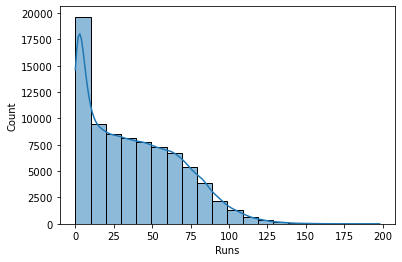

In [74]:
sns.histplot(bb2['Runs'], bins=20, kde = True)

In [75]:
# Clean extreme values in 'Runs' - Only values less than 150

bb2 = bb2[bb2['Runs'] < 150]

<AxesSubplot:xlabel='Runs', ylabel='Count'>

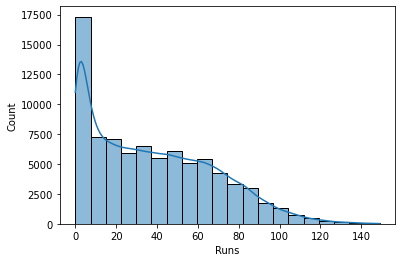

In [76]:
sns.histplot(bb2['Runs'], bins=20, kde = True)

<AxesSubplot:xlabel='On Base Percentage', ylabel='Count'>

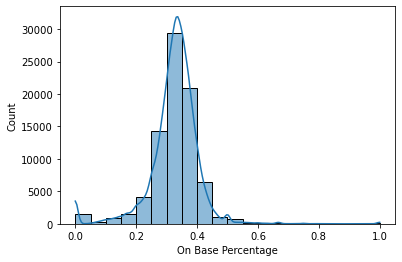

In [77]:
# on base percentage

sns.histplot(bb2['On Base Percentage'], bins=20, kde = True)

In [78]:
# leave as is

<AxesSubplot:xlabel='Walk', ylabel='Count'>

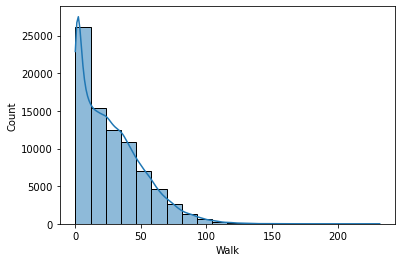

In [80]:
# check for walks

sns.histplot(bb2['Walk'], bins=20, kde = True)

In [81]:
# Clean extreme values in 'Walk' - Only values less than 125

bb2 = bb2[bb2['Walk'] < 125]

<AxesSubplot:xlabel='Walk', ylabel='Count'>

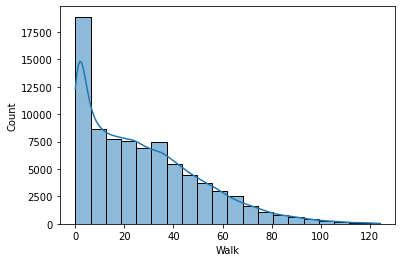

In [82]:
# check for new walks

sns.histplot(bb2['Walk'], bins=20, kde = True)

<AxesSubplot:xlabel='Home Run', ylabel='Count'>

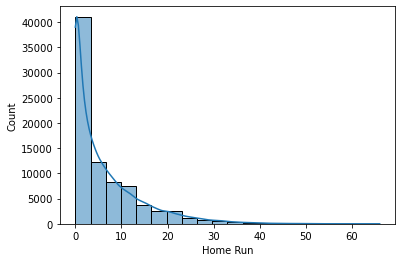

In [83]:
# check for Home Runs

sns.histplot(bb2['Home Run'], bins=20, kde = True)

In [88]:
# Clean extreme values in 'Home Run' - Only values less than 55

bb2 = bb2[bb2['Home Run'] < 55]

<AxesSubplot:xlabel='Home Run', ylabel='Count'>

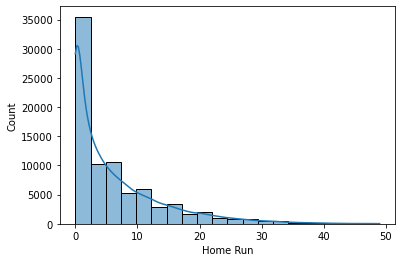

In [89]:
# check for NEW Home Runs

sns.histplot(bb2['Home Run'], bins=20, kde = True)

# Plotting a choropleth

In [90]:
# Create a data frame with just the states and the values for Runs we want plotted

data_to_plot = bb2[['state_name','Runs']]
data_to_plot.head()

,state_name,Runs
12,Georgia,117.0
13,Georgia,113.0
14,Georgia,84.0
15,Georgia,100.0
16,Georgia,103.0


In [91]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state_name', 'Runs'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Runs").add_to(map)
folium.LayerControl().add_to(map)

map

In [92]:
bb2['Runs'].value_counts()

0.0      3781
1.0      3048
2.0      2508
3.0      2011
4.0      1739
         ... 
141.0       4
146.0       3
144.0       2
148.0       2
147.0       2
Name: Runs, Length: 150, dtype: int64

In [93]:
bb2['state_name'].value_counts()

California        9665
Pennsylvania      9462
Ohio              9315
Illinois          9287
New York          7809
Maryland          7776
Texas             5330
Missouri          5112
Califonia         3147
Minnesota         2834
Georgia           2602
Wisconsin         2351
Washington        2152
Colorado          1524
Arizona           1227
Florida           1179
Kansas             636
Washington, DC      29
Name: state_name, dtype: int64

In [100]:
data_to_plot_2 = bb2[['state_name','Home Run']]
data_to_plot_2.head()

,state_name,Home Run
12,Georgia,44.0
13,Georgia,39.0
14,Georgia,29.0
15,Georgia,44.0
16,Georgia,38.0


In [102]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_2,
    columns = ['state_name', 'Home Run'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Home Run").add_to(map)
folium.LayerControl().add_to(map)

In [ ]:
# final shape check

bb.shape()

In [ ]:
# Data Export

bb.to_csv(os.path.join(path, '02 Data','Prepped Data', 'CLEANED Baseball Hitter.csv'))